<function matplotlib.pyplot.show(close=None, block=None)>

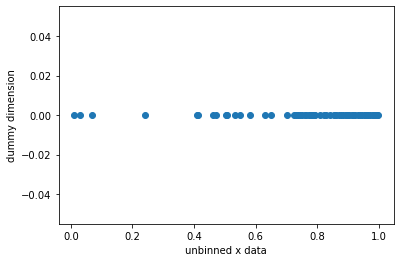

In [1]:

import numpy as np
from random import random
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from math import exp


xi = np.array([0.01,0.03,0.07,0.24,0.41,0.413,0.46,0.47,0.505,0.507,0.534,0.55,0.58,0.63,0.65,
0.701,0.723,0.731,0.737,0.743,0.751,0.76,0.763,0.773,0.775,0.781,0.787,0.789,0.792,
    0.81,0.821,0.829,0.842,0.853,0.859,0.862,0.871,0.878,0.883,0.892,0.894,
    0.901,0.903,0.914,0.917,0.9214,0.932,0.939,0.944,0.9542,0.956,0.958,0.966,0.971,0.981,0.982,0.987,0.991,0.993,0.998])
yi_dummy = np.zeros_like(xi)
fig,ax = plt.subplots()
plt.scatter(xi,yi_dummy)
plt.xlabel('unbinned x data')
plt.ylabel('dummy dimension')
plt.show

In [3]:
def logL_explorer(loglike,maximum=True,xmin=0,xmax=1):
    theta = np.linspace(xmin,xmax,20000)
    logl = np.array([loglike(th) for th in theta])
    if not maximum : logl = -logl
    lmax = np.max(logl)
    maxindex = np.argmax(logl)
    thetamax = theta[maxindex]
    print("maximum for logL=",lmax,"at theta",thetamax)
    l_onesig = lmax - 1/2
    sigma_minus_index = np.searchsorted(logl[:maxindex], l_onesig)   
    sigma_minus = thetamax-theta[sigma_minus_index]
    sigma_plus_index  = np.searchsorted(np.flip(logl[maxindex:]), l_onesig)
    theta_flipped = np.flip(theta[maxindex:])
    sigma_plus =  theta_flipped[sigma_plus_index] - thetamax
    print("theta =", thetamax ,"+",sigma_plus,"-",sigma_minus)   
    return thetamax,sigma_plus,sigma_minus

maximum for logL= 23.40237862224527 at theta 0.1409070453522676
theta = 0.1409070453522676 + 0.0889044452222611 - 0.06565328266413321
ok
previously we fitted the same data binned (10 bins from 0-1) and obtained theta = 0.13480674033701684 + 0.08755437771888594 - 0.06425321266063302


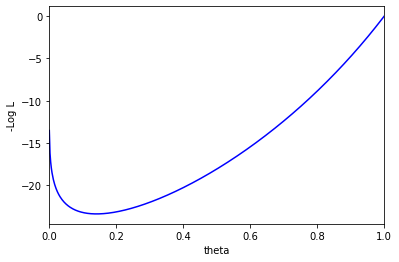

In [4]:

def rho1(x): return 1  # constant
def rho2(x): return 3*x*x
def rho(x,theta): 
    return theta*rho1(x)+(1-theta)*rho2(x)
assert(abs(integrate.quad(rho1,0,1)[0]-1.)<1.e-5)
assert(abs(integrate.quad(rho2,0,1)[0]-1.)<1.e-5)

def negative_logL_unbinnedML(theta):
    return -np.sum(np.log(rho(xi,theta)))  

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
plt.margins(x=0) #disable plotting margins on x axis
thetaplot = np.linspace(0.,1.,500)
logLplot = [ negative_logL_unbinnedML(theta) for theta in thetaplot]

plt.plot(thetaplot,logLplot, 'b')
plt.xlabel('theta')
plt.ylabel('-Log L')
plt.show
fig.savefig("log_l_plot_poisson.pdf")
thetamax,sig1,sig2 = logL_explorer(negative_logL_unbinnedML,maximum=False,xmin=0,xmax=1)
print("ok")
print("previously we fitted the same data binned (10 bins from 0-1) and obtained theta = 0.13480674033701684 + 0.08755437771888594 - 0.06425321266063302")

now we compare binned data to unbinned ML fit results
binned data, not used for fit [ 3  0  1  0  4  5  2 14 12 19]


<function matplotlib.pyplot.show(close=None, block=None)>

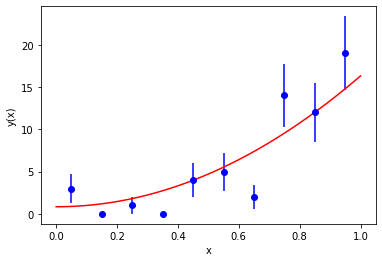

In [6]:
print("now we compare binned data to unbinned ML fit results")
yi_binned = np.histogram(xi,bins=10,range=(0,1))[0]
xi_binned = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
print("binned data, not used for fit",yi_binned)
fig, ax = plt.subplots()
plt.errorbar(xi_binned,yi_binned,np.sqrt(yi_binned), fmt='o', color='blue')
plt.xlabel('x')
plt.ylabel('y(x)')
xplot = np.linspace(0,1,500)
S = len(xi)
binwid = 0.1
fitplot = np.array([S*binwid*rho(x,thetamax) for x in xplot])
plt.plot(xplot,fitplot, 'r')
plt.show